<a href="https://colab.research.google.com/github/Kimyongju40/Kim.github.io/blob/main/%08n121a_Bayesian_Inference_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 1*

---

# 📝 Assignment


# 🌱 **기본 과제**

## **Part 1. 전체 확률의 법칙**

> 우리에게는 구부러진 동전이 있습니다. <br>
그리고 이 동전을 던졌을 때, 앞면이 나올 확률은 **0.8** 입니다.




##### **Q1.  해당 동전을 4번 던졌을 때의 진리표를 직접 작성해보세요. 진리표를 통해, 나올 수 있는 모든 경우의 수와, 2개의 앞면이 나오는 경우의 수를 확인한 후, (`모든 경우의 수` , `2개의 앞면이 나오는 경우의 수`) 의 형태로 쓰세요.** e.g. (12, 3)

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [34]:
df=pd.DataFrame([[1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],[1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0],[1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0],[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]]).T
df


,0,1,2,3
0,1,1,1,1
1,1,1,1,0
2,1,1,0,1
3,1,1,0,0
4,1,0,1,1
5,1,0,1,0
6,1,0,0,1
7,1,0,0,0
8,0,1,1,1
9,0,1,1,0


## **Part 2. 이항 분포**

앞서 진행한 것 처럼 모든 경우에 대한 진리표에서 특정 경우의 수를 확인할수도 있지만, 이는 경우의 수가 증가함에 따라 매우 비효율적인 방법입니다.

따라서 이항분포의 formula를 활용하여 우리가 찾고자 하는 경우의 수를 확인해보도록 하겠습니다.

<br>

> 1번 문제와 마찬가지로 우리에게 주어진 동전은 구부러져있으며, 앞면이 나올 확률은 **0.8** 입니다.






##### **Q2. 해당 동전을 16번 던졌을 때, 8개의 앞면이 나올 확률을 반올림하여 소수점 셋째 자리까지 구하세요.**




- `math` 라이브러리의 [`factorial`](https://www.geeksforgeeks.org/python-math-factorial-function/)을 활용해보세요.

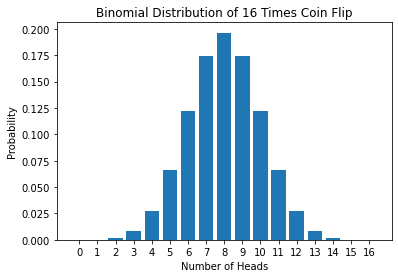

In [20]:
problist = []

for i in range(17):
  res = math.factorial(16) / (math.factorial(i) * math.factorial(16 - i))
  problist.append(res / 2**16)

df = pd.DataFrame({'p' : problist})

x = np.arange(0,17)
plt.bar(x, 'p', data=df)
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Binomial Distribution of 16 Times Coin Flip')
plt.xticks(x);

In [21]:
#다음과 같이 이항분포 formula를 구현할 수 있습니다.

n=16
k=8
p=0.8

round((math.factorial(n) / (math.factorial(k) * math.factorial(n-k))) * (p**k) * ((1-p)**(n-k)),3)

0.006

## **Part 3. 조건부 확률**

> 여러분은 A 학원 사이트의 로그 데이터를 확인하고 있습니다. 초기 등록자는 40명이었지만, 해당 학원에 최종적으로 등록한 학생 수와 등록하지 않은 학생 수는 다음과 같습니다. 

|구분| 최종 등록 | 등록 포기 |
|:-:|:-------:|:-------:|
|국어|10|5|
|수학|15|10|




##### **Q3. 초기 등록자 중 임의로 선택한 한 명이 최종 등록한 학생이었을 때, 그 학생이 수학 과목에 등록했을 확률을 구하세요.**

In [1]:
#조건부 확률로 계산합니다.

# 최종 등록한 학생일 확률
enroll = (10 + 15) / 40
# 수학 과목에 최종 등록한 학생일 확률
math = 15 / 40

math / enroll

0.6

## **Part 4. 베이지안 추론**

### **4-1. Exam Answer**

> 오지선다 문제를 푸는 과정에서, 학생은 답을 이미 알고 있거나 찍어야 합니다. 
> 
> 학생이 답을 알 확률은 **0.3**이고, 답을 찍어서 맞출 확률은 **0.2**이며, 문제의 답을 알고있다면 반드시 맞춘다고 가정합니다.



##### **Q4. 학생이 문제의 답을 맞췄을 때, 답을 알고 있었을 확률을 반올림하여 소수점 둘째 자리까지 구하세요.** 

In [3]:
#사전확률은 학생이 답을 알 확률 0.3입니다.
#우리가 알고 있는 데이터는 답을 찍었을 때 맞출 확률 0.2와 문제의 답을 알고 있을 때 맞을 확률 1입니다.
#이를 바탕으로 다음과 같이 사후확률을 계산할 수 있습니다.

# 사전확률
know = 0.3
dontknow = 0.7

# evidence
correct_dontknow = 0.2
correct_know = 1

# 사후확률
round((correct_know * know) / ((correct_know * know) + (correct_dontknow * dontknow)),2)

0.68

### **4-2. Disease Detection**

> 특정 질병을 가지고 있는 경우 **`tpr`** 의 확률로 탐지할 수 있는 실험 방법이 있습니다.
> 
> 그러나 동시에 이 방법은 **`fpr`** 의 확률로 질병이 없지만 질병이 있다고 진단하는 경우도 있는데요.
> 
> 실제로 모든 인구 중 이 질병을 가지고 있을 확률은 **`prior`** 입니다.

##### **Q5. 특정 사람이 이 방법을 통해 질병이 있다고 진단받았을 때, 실제로 질병을 가지고 있을 확률을 구하는 함수를 완성한 후 `tpr=0.9`, `fpr=0.01`, `prior=0.1` 일 때의 결과값(`posterior`)을 반올림하여 소수점 둘째 자리까지 구하세요.**

In [7]:
#사전확률과 데이터를 바탕으로 사용자 정의 함수 disease_test(tpr, fpr, prior)를 완성하세요.

# 사전확률
tpr=0.9
fpr=0.01
prior=0.1

disease = prior
healthy = 1 - prior

# evidence
pos_disease = tpr
pos_healthy = fpr

# 사후확률
posterior = (pos_disease * disease) / ((pos_disease * disease) + (pos_healthy * healthy))
round(posterior,2)

0.91

### **4-3. Guilty or Not**

> 한 범죄사건의 용의자가 유죄일 확률은 **60%**라고 형사는 확신하고 있습니다.
> 
> 그 후 **해당 사건의 범인이 왼손잡이**라는 증거가 발견되었고, 용의자는 왼손잡이 입니다. **전체 인구의 20%**가 이 특성(왼손잡이)을 가지고 있습니다.





##### **Q6. 증거가 발견된 후, 이제 형사는 용의자가 유죄일 확률을 얼마로 확신하고 있는지 반올림하여 소수점 둘째자리까지 구하세요.**

In [9]:
#사전확률은 형사가 확신하고 있는 용의자가 유죄일 확률 0.6,
#우리가 알고 있는 데이터는 범인이 왼손잡이일 확률 1, 전체 인구에 대한 왼손잡이의 비율 0.2입니다.
#이를 바탕으로 다음과 같이 사후확률을 계산할 수 있습니다.

# 사전확률
guilty = 0.6
notguilty = 0.4

# evidence
left_notguilty = 0.2
left_guilty = 1

# 사후확률
p=(left_guilty * guilty) / ((left_guilty * guilty) + (left_notguilty * notguilty))
round(p,2)

0.88

# 🥇 **도전 과제**



## **Part 5. 이항분포**

Scipy의 Stats 라이브러리의 [binomial 메서드](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html)를 참고하여, 앞면이 나올 확률이 **0.75**인 구부러진 동전을 100번 던졌을 때, 35번 앞면이 나올 확률을 구해보세요.

In [26]:
# 이곳에 코드를 작성하세요.

## **Part 6. 몬티홀 문제**


다음 [영상](https://www.youtube.com/watch?v=UexhMS_F5Qw)에서 등장하는 몬티홀 딜레마 문제를 베이지안 공식을 활용하여 해결해보세요.

- 처음에 1번 문을 선택했다고 가정합니다. 진행자가 남은 두 개의 문 중 염소가 있는 문 하나를 공개한 상태에서 기존에 선택했던 문(1번문)에 자동차가 있을 확률을 구하세요. 

- 처음 선택을 유지하는 것이 유리한지, 아니면 선택을 바꾸는 것이 유리한지 생각해보세요.

```
Hypothesis: 1번 문 뒤에 자동차가 있음
Evidence: 진행자가 염소가 있는 문을 열어줌

우리가 알고자 하는 것: P(H|E) -> 진행자가 염소가 있는 문을 열었을 때, 우리가 먼저 선택했던 문 안에 자동차가 있을 확률
```


In [27]:
# 이곳에 코드를 작성하세요.